1.	We defined the Gini index value for a node in a classification tree as
$$2 p (1-p)$$
Where p is the estimated probability of either of the two classes.  For example, if a node has 30 training instances of class A, and 50 training instances of class B, then the estimated probability of class A is $$30/(30 + 50)$$  What is the Gini index value for this node?



2.	Create a new Python file.  Fill in the code below to create a function that gives the Gini value for a node in a binary classification tree given values for the number of instances of each class.  class_counts is a list of length two.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
def gini(class_counts):
    ''' return the Gini value for a node in a binary classif. tree '''
    # your code here (don't forget the return statement)
    p = class_counts[0]/(sum(class_counts))
    return 2*p*(1-p)

3.	Test your function.  What is gini([30, 50])? gini([10, 10])?  What is gini([20, 0])?  What is gini([100, 0])? 

In [3]:
print(gini([30,50]))
print(gini([10,10]))
print(gini([20,0]))
print(gini([100,0]))

0.46875
0.5
0.0
0.0


4.	Add the following code at the top of your file to read and preprocess the data.

In [4]:

df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1

df = df[['age', 'maxhr', 'restbp', 'output']]

5.	Run the code and look at the plot.  If we were going to build a classification tree, and split first on 'age', what do you think a good age value to split on would be?

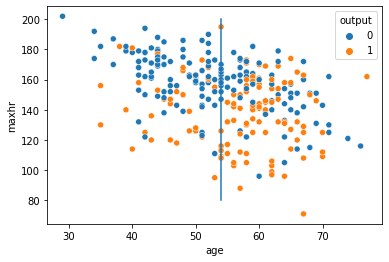

In [6]:
sns.scatterplot(x='age', y='maxhr', hue='output', data=df)
# plt.plot([54,54],[80,200])
''' I would think a split around 52-54 would be ideal '''

6.	Compute the Gini index for df as a whole.  For this you just need the number of rows with output = 0 and the number of rows with output = 1.

In [20]:
output_counts = df['output'].value_counts() 
print('Output counts: \n', output_counts)
print('Gini:', gini(output_counts).round(2))

Output counts: 
 0    150
1    120
Name: output, dtype: int64
Gini: 0.49


7.	Now consider a split on age < 50.  Write code to compute the Gini index for the case of of age < 50 and the Gini index for the case of age >= 50.  For the case of age < 50, get the rows of df where age < 50, then count the number of rows with output = 0 and output = 1.  

In [38]:
less_than_50 = df.loc[df['age'] < 50, 'output'].value_counts()
greater_equal_to_50 = df.loc[df['age'] >= 50, 'output'].value_counts()
# print(less_than_50)
# print(greater_equal_to_50)
print('Gini index for age < 50:', gini(less_than_50).round(2))
print('Gini index for age >= 50:', gini(greater_equal_to_50).round(2))

79
Gini index for age < 50: 0.41
Gini index for age >= 50: 0.5


8.	Now compute the overall Gini index value for the split on age < 50.  First you need to compute the fraction of nodes associated with age < 50 (call it fraction_lo) and the fraction of nodes associated with age >= 50 (call it fraction_hi).  Then get the Gini value for the split like this (in pseudo code):  
```gini_split = gini_lo * fraction_lo + gini_hi * fraction_hi```  
  
The split is useful if the Gini value for the split is lower than the GIni value for the root.

In [41]:
fraction_lo = less_than_50.sum() / df.index.size
gini_lo = gini(less_than_50) / df.index.size
fraction_hi = greater_equal_to_50.sum()
gini_hi = gini(less_than_50)
gini_split = gini_lo * fraction_lo + gini_hi * fraction_hi
gini_split

78.83653125301532

9.	Is a split on age < 40 better than a split on age < 50?

In [43]:
less_than_40 = df.loc[df['age'] < 40, 'output'].value_counts()
print('Gini index for age < 40:', gini(less_than_40).round(2))

''' The gini index for < 40 is higher than the gini index of < 50 (0.44 vs. 0.41 respectively)'''

Gini index for age < 40: 0.44


10.	Compute the Gini value for all age splits where age ranges from 20 to 80.  Then plot the Gini split value for all the ages (age on x axis, Gini value on y axis).  What is the best age value for a split on age?

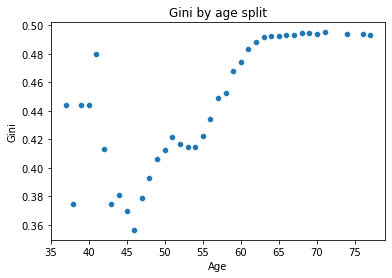

In [73]:

# get age splits
age_splits = df.loc[(df['age'] >= 20) & (df['age'] <= 80), 'age'].unique()
age_split_gini = []
ages = []
# calculate gini for each age split (< age)
for age in age_splits:
    outputs = df.loc[df['age'] < age, 'output'].value_counts()
    if (len(outputs) > 1):
        age_split_gini.append(gini(outputs))
        ages.append(age)
# graph    
sns.scatterplot(x=ages, y=age_split_gini)
plt.title("Gini by age split")
plt.xlabel("Age")
plt.ylabel("Gini");
   


mk,11.	If you still have time, do the same thing for features 'maxhr' and 'restbp'.  What is the best feature and best split?